In [1190]:
#importing all relevant libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [1191]:
#loading dataset extending max columns and rows

data = pd.read_csv('train.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [1192]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1193]:
data.shape

(1460, 81)

In [1194]:
#percentage of null values in each columns

round(data.isnull().sum() * 100 / len(data),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [1195]:
#imputing null values in respective columns which has meaningful data for NA

data['PoolQC'] = data['PoolQC'].fillna('No Pool')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('No alley access')
data['Fence'] = data['Fence'].fillna('No Fence')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')

#imputong null values with median value
data['LotFrontage'] = data.LotFrontage.fillna(data.LotFrontage.median())

#NA means None
data[['MasVnrType','MasVnrArea']] = data[['MasVnrType','MasVnrArea']].fillna('None')

# NA means No Garage
data[['GarageType','GarageFinish','GarageCond','GarageQual']] = data[['GarageType','GarageFinish','GarageCond','GarageQual']].fillna('No Garage')

# NA means 'No Basement'
data[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']] = data[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']].fillna('No Basement')



In [1196]:
#dropping null values

df = data[~((data['GarageYrBlt'].isnull()) | (data['Electrical'].isnull()))]

In [1197]:
round(100* df.isnull().sum()/len(df), 2).sort_values(ascending=False)

SalePrice        0.0
Heating          0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
LandContour      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
Utilities        0.0
OverallQual      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
TotalBsmtSF      0.0
HeatingQC        0.0
SaleCondition    0.0
CentralAir       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

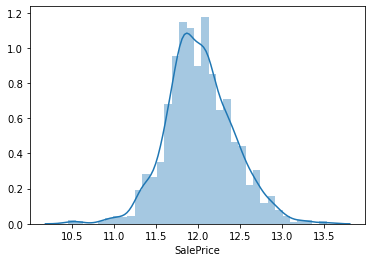

In [1198]:
#Dealing with outlier problems in our target variable

data['SalePrice'] = np.log(data['SalePrice'])

sns.distplot(data['SalePrice'])
plt.show()

In [1199]:
df['Street'] = df['Street'].map({'Pave':1, 'Grvl':0})
df['Utilities'] = df['Utilities'].map({'AllPub':1, 'NoSeWa':0})
df['Alley'] = df['Alley'].map({'Pave':1, 'Grvl':0, 'No alley access':2})
df['LandSlope'] = df['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})
df['CentralAir'] = df['CentralAir'].map({'Y':1, 'N':0})

df['MasVnrArea']= df['MasVnrArea'].replace('None', 0) #converting 'none' to 0
df['MasVnrArea'] = df['MasVnrArea'].astype('float64')


#ordinal
df['FireplaceQu'] = df['FireplaceQu'].map({'No Fireplace':-1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}) 

df['Fence'] = df['Fence'].map({'No Fence':-1,'MnWw':1,'GdWo':2, 'MnPrv':3, 'GdPrv':4})

In [1200]:
#Deriving 'age' variable from year built and year sold

df['age'] = df['YrSold'] - df['YearBuilt']

In [1201]:
# map to_numeric converting to discrete data
 
df['ExterQual'] = df['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd': 3, 'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'No Basement':-1, 'Po':0, 'Fa':1, 'TA':2, 'Gd': 3, 'Ex':4})
df['BsmtExposure'] = df['BsmtExposure'].map({'No Basement':-1, 'No':0, 'Av':1, 'Mn':2, 'Gd': 3, 'Ex':4})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd': 3, 'Ex':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd': 3, 'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'No Garage':-1, 'Unf':1, 'RFn':2, 'Fin':3})



In [1202]:
#Segragating df by datatypes object and numeric

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_object = df.select_dtypes(include=['object'])

In [1203]:
#dropping highly skewed and irrelevant numeric data

df_numeric = df_numeric.drop(['Id','MSSubClass', 'YrSold','GarageYrBlt','WoodDeckSF', 'YearBuilt', 
                              'Utilities','YearRemodAdd','CentralAir','LandSlope','Alley','Street',
                             'PoolArea','Fence','EnclosedPorch','MiscVal','ScreenPorch','3SsnPorch',
                             'LowQualFinSF','MasVnrArea'], axis=1)



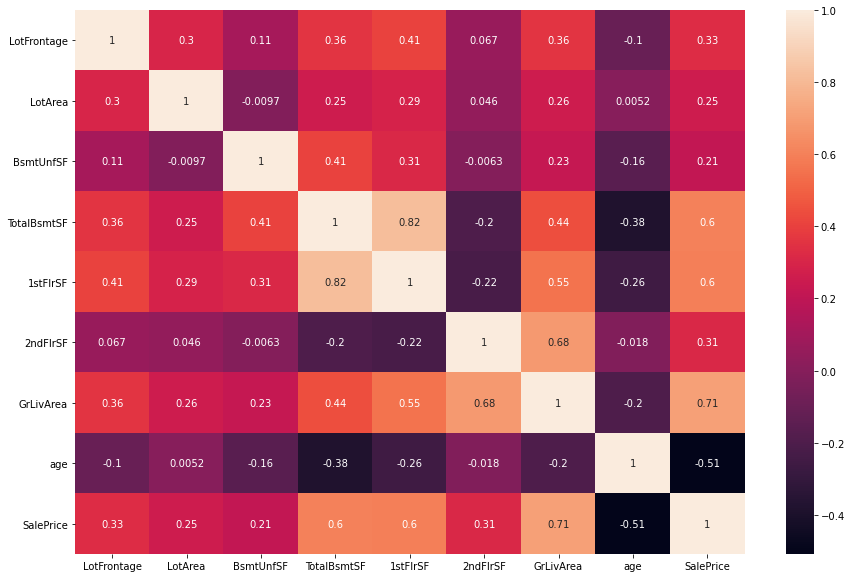

In [1204]:
#checking if there's any correlation taking place between continuous variables

df_continuous = df_numeric[['LotFrontage', 'LotArea', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','age', 'SalePrice']]

plt.figure(figsize=(15,10))
sns.heatmap(df_continuous.corr(), annot=True)
plt.show()

In [1205]:
# judging on correlation strength as shown by the heatmap above we chose to drop variables'LotFrontage','TotalBsmtSF','1stFlrSF','2ndFlrSF' 
df_numeric = df_numeric.drop(['LotFrontage','TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1)


df_numeric.shape

(1378, 28)

In [1206]:
df_object = df.select_dtypes(include=['object'])
df_object.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond',
       'Foundation', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'Electrical', 'Functional', 'GarageType', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1207]:
#dropping highly skewed and irrelevant categorical data

objects = df_object.drop(['MSZoning', 'LandContour', 'Condition1', 'Condition2', 'BldgType', 'Heating', 'BsmtFinType2', 'Electrical', 'Functional',
                         'PoolQC', 'MiscFeature', 'SaleType', 'GarageCond', 'PavedDrive', 'GarageQual',
                         'ExterCond','BsmtCond',], axis=1)
objects.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType1', 'GarageType', 'SaleCondition'],
      dtype='object')

In [1208]:
df_object_dummies = pd.get_dummies(objects, drop_first=True)
df_final = pd.concat([df_numeric,df_object_dummies], axis=1)

In [1209]:
df_final.shape

(1378, 130)

In [1210]:
df_final.isnull().sum().sort_values(ascending=False)

SaleCondition_Partial    0
LotConfig_FR2            0
LotConfig_Inside         0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
                        ..
Exterior2nd_AsphShn      0
Exterior2nd_Brk Cmn      0
Exterior2nd_BrkFace      0
Exterior2nd_CBlock       0
LotArea                  0
Length: 130, dtype: int64

In [1211]:
df_final = df_final.reset_index(drop=True)

## Handling Outliers

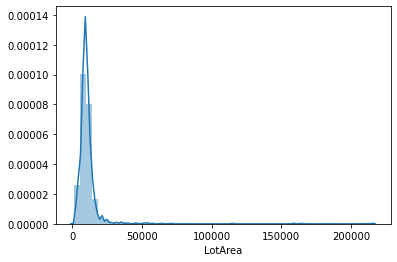

In [1212]:
sns.distplot(df_final['LotArea'])
plt.show()


In [1213]:
df_final = df_final[~(df_final['LotArea'] > 50000)]


In [1214]:
df_final.shape

(1367, 130)

# Preprocessing

In [1160]:
df_numeric.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'MoSold', 'SalePrice', 'age'],
      dtype='object')

In [1161]:
train_df, test_df = train_test_split(df_final, train_size=0.7, test_size=0.3, random_state=100)

In [1162]:
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
        'MoSold', 'SalePrice', 'age']

train_df[numeric_vars] = scaler.fit_transform(train_df[numeric_vars])
#train_df.head()

In [1163]:
# apply rescaling to the test set also
test_df[numeric_vars] = scaler.transform(test_df[numeric_vars])
#df_test.head()

In [1164]:
Y_train= train_df.pop('SalePrice')
X_train= train_df

Y_test = test_df.pop('SalePrice')
X_test = test_df

# Ridge Regression

In [1165]:
# list of alphas to tune
params = {'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1,2,4, 5,10,20,30,40,50,100,200,300]}


ridge = Ridge()

# cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 4,
                                   5, 10, 20, 30, 40, 50, 100, 200, 300]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1166]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=50]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010771,0.005293,0.005210,0.001481,0.01,{'alpha': 0.01},-0.028614,-0.027497,-0.026746,-0.024738,-0.033196,-0.028158,0.002818,11,-0.022636,-0.023742,-0.023398,-0.023373,-0.020933,-0.022817,0.001009
1,0.010026,0.005520,0.004386,0.002568,0.05,{'alpha': 0.05},-0.028250,-0.027417,-0.026521,-0.024743,-0.033015,-0.027989,0.002769,10,-0.022663,-0.023746,-0.023398,-0.023382,-0.020938,-0.022825,0.001007
2,0.010970,0.003153,0.005585,0.001852,0.1,{'alpha': 0.1},-0.028082,-0.027316,-0.026301,-0.024753,-0.032801,-0.027851,0.002715,9,-0.022683,-0.023752,-0.023405,-0.023389,-0.020940,-0.022834,0.001009
3,0.011569,0.002327,0.004586,0.000489,0.2,{'alpha': 0.2},-0.027910,-0.027138,-0.025971,-0.024809,-0.032443,-0.027654,0.002615,8,-0.022714,-0.023762,-0.023443,-0.023405,-0.020953,-0.022855,0.001011
4,0.008555,0.006029,0.006533,0.004600,0.3,{'alpha': 0.3},-0.027796,-0.026968,-0.025716,-0.024877,-0.032138,-0.027499,0.002527,7,-0.022740,-0.023773,-0.023486,-0.023418,-0.020969,-0.022877,0.001013


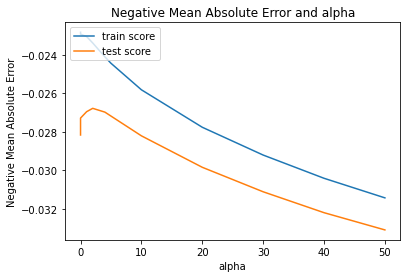

In [1167]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1168]:
ridge = Ridge(alpha=5)
ridge.fit(X_train, Y_train)

# predict
y_train_pred = ridge.predict(X_train)
print('Train Score: ',metrics.r2_score(y_true=Y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('Test Score: ' ,metrics.r2_score(y_true=Y_test, y_pred=y_test_pred))



Train Score:  0.8704902527139192
Test Score:  0.8660439273472375


In [1169]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
ridge.coef_

array([ 4.43242456e-02,  9.37228525e-02,  4.84465346e-02,  2.14880755e-02,
        4.29190958e-02,  2.74173534e-02,  8.72664569e-02,  1.92815369e-02,
        3.80166966e-02,  4.60375831e-03,  1.04048781e-01,  6.59776752e-03,
       -8.32887012e-03,  2.96658697e-02,  2.17339226e-02,  4.82084407e-03,
       -4.86983448e-02,  4.37797658e-02,  7.29059343e-02,  2.93905707e-02,
        8.69141298e-04,  8.96028659e-03,  3.19322105e-02,  3.95561991e-02,
        1.28844925e-05, -6.97492335e-03, -6.86227723e-03,  7.08047598e-03,
        1.32882933e-03,  7.02043364e-04,  1.36045579e-02, -1.03173116e-02,
       -1.15031054e-02, -3.21039228e-03, -8.15220582e-03, -5.08951314e-03,
        6.32103854e-03,  6.76403981e-03, -5.46439830e-03,  2.03143139e-02,
       -1.18588438e-02, -1.44456149e-02, -9.01992437e-03, -1.43376986e-02,
       -1.43832709e-02, -9.07552572e-03, -3.53231752e-03, -1.03663249e-02,
        5.61083574e-02,  3.90711406e-02, -1.42122409e-02, -5.75728168e-03,
       -8.53855937e-03, -

In [1170]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_final.columns
cols = cols.insert(0, "constant")
x = list(zip(cols, model_parameters))

#dropping all zero value coefficients and sorting features by values

hyperparameter_ridge = []
for i in x:
    if i[1] != float(0.0) or float(-0.0):
        hyperparameter_ridge.append(i)
        hyperparameter_ridge
hyperparameter_ridge
sorted(hyperparameter_ridge, key=lambda tup:(-tup[1], tup[0]))



[('GrLivArea', 0.104),
 ('OverallQual', 0.094),
 ('BsmtFinSF1', 0.087),
 ('TotRmsAbvGrd', 0.073),
 ('Neighborhood_NWAmes', 0.056),
 ('Neighborhood_Somerst', 0.049),
 ('OverallCond', 0.048),
 ('KitchenQual', 0.044),
 ('LotArea', 0.044),
 ('BsmtQual', 0.043),
 ('GarageArea', 0.04),
 ('Neighborhood_NoRidge', 0.039),
 ('BsmtUnfSF', 0.038),
 ('Exterior2nd_HdBoard', 0.034),
 ('GarageCars', 0.032),
 ('FullBath', 0.03),
 ('Fireplaces', 0.029),
 ('BsmtExposure', 0.027),
 ('SaleCondition_Normal', 0.027),
 ('BsmtFinType1_LwQ', 0.025),
 ('Foundation_PConc', 0.024),
 ('Exterior1st_BrkComm', 0.023),
 ('HalfBath', 0.022),
 ('ExterQual', 0.021),
 ('Neighborhood_CollgCr', 0.02),
 ('BsmtFinSF2', 0.019),
 ('LotShape_Reg', 0.014),
 ('Exterior1st_Stone', 0.012),
 ('GarageType_Basment', 0.011),
 ('Exterior2nd_Stucco', 0.01),
 ('MasVnrType_None', 0.01),
 ('BsmtFinType1_BLQ', 0.009),
 ('Foundation_CBlock', 0.009),
 ('GarageFinish', 0.009),
 ('MasVnrType_Stone', 0.009),
 ('BsmtFinType1_Unf', 0.008),
 ('BsmtFul

In [1171]:
len(hyperparameter_ridge)

124

# Lasso Regression

In [1172]:
params_lasso = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05]}


lasso = Lasso()

# cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    2.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1173]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.002]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.131448,0.031755,0.006583,0.001849,1e-07,{'alpha': 1e-07},-0.028464,-0.027608,-0.026794,-0.024754,-0.033214,-0.028167,0.002807,4,-0.022647,-0.023742,-0.023397,-0.023372,-0.020933,-0.022818,0.001008
1,0.121890,0.016944,0.005386,0.001354,1e-06,{'alpha': 1e-06},-0.028377,-0.027583,-0.026690,-0.024701,-0.033147,-0.028100,0.002806,3,-0.022652,-0.023744,-0.023399,-0.023377,-0.020947,-0.022824,0.001004
2,0.054236,0.021352,0.005194,0.001941,1e-05,{'alpha': 1e-05},-0.027917,-0.027206,-0.026017,-0.024492,-0.032617,-0.027650,0.002742,2,-0.022680,-0.023760,-0.023440,-0.023428,-0.021028,-0.022867,0.000986
3,0.016354,0.003375,0.004788,0.000978,0.0001,{'alpha': 0.0001},-0.027172,-0.024776,-0.022957,-0.024320,-0.030387,-0.025923,0.002614,1,-0.023326,-0.024053,-0.023868,-0.023665,-0.021530,-0.023288,0.000912
4,0.011352,0.005244,0.007313,0.004313,0.001,{'alpha': 0.001},-0.032049,-0.027774,-0.025857,-0.028614,-0.032875,-0.029434,0.002642,5,-0.028473,-0.028558,-0.028578,-0.028090,-0.026733,-0.028086,0.000700


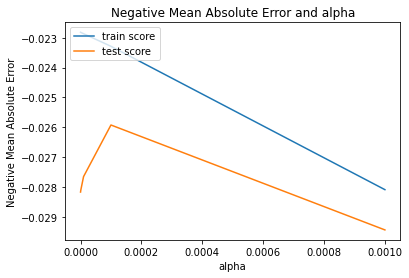

In [1174]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1215]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, Y_train)

# predict
y_train_pred = lasso.predict(X_train)
print('Train Score: ',metrics.r2_score(y_true=Y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print('Test Score: ',metrics.r2_score(y_true=Y_test, y_pred=y_test_pred))

Train Score:  0.8770359325623198
Test Score:  0.8795270785505371


In [1176]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train) 

Lasso(alpha=0.0001)

In [1177]:
lasso.coef_

array([ 3.98722541e-02,  1.22071520e-01,  6.01070796e-02,  9.88532111e-03,
        4.77404465e-02,  2.41484444e-02,  1.10011890e-01,  2.33779641e-02,
        4.19292071e-02,  0.00000000e+00,  2.31129006e-01,  0.00000000e+00,
       -7.28767206e-03,  9.37978782e-04,  1.07493328e-02, -6.42824062e-03,
       -7.44364428e-02,  3.83548395e-02,  5.95713183e-02,  2.17006318e-02,
       -1.75660423e-03,  6.48972900e-03,  2.76829969e-02,  3.07749488e-02,
       -9.54722928e-06, -7.37806177e-03, -1.00055664e-02,  2.69885936e-03,
        0.00000000e+00,  5.10802087e-04,  1.30282321e-02, -3.15639358e-03,
       -0.00000000e+00, -1.25593422e-03, -0.00000000e+00, -0.00000000e+00,
        1.04579376e-02,  8.96409928e-03,  1.72078757e-03,  2.02292669e-02,
       -4.10957361e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -4.80085296e-03, -2.92355759e-03,  0.00000000e+00, -5.39829676e-03,
        5.67444704e-02,  4.73627716e-02, -8.91654860e-03, -2.39860813e-04,
       -0.00000000e+00, -

In [1178]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_final.columns
cols = cols.insert(0, "constant")
y = list(zip(cols, model_parameters))

#dropping all zero value coefficients and sorting features by values

hyperparameter_lasso = []
for i in y:
    if i[1] != float(0.0) or float(-0.0):
        hyperparameter_lasso.append(i)
        hyperparameter_lasso
hyperparameter_lasso
sorted(hyperparameter_lasso, key=lambda tup:(-tup[1], tup[0]))



[('GrLivArea', 0.231),
 ('OverallQual', 0.122),
 ('BsmtFinSF1', 0.11),
 ('Neighborhood_Somerst', 0.06),
 ('OverallCond', 0.06),
 ('TotRmsAbvGrd', 0.06),
 ('Neighborhood_NWAmes', 0.057),
 ('BsmtQual', 0.048),
 ('Neighborhood_NoRidge', 0.047),
 ('BsmtUnfSF', 0.042),
 ('BsmtFinType1_LwQ', 0.04),
 ('LotArea', 0.04),
 ('KitchenQual', 0.038),
 ('Exterior2nd_HdBoard', 0.034),
 ('GarageArea', 0.031),
 ('SaleCondition_Normal', 0.029),
 ('GarageCars', 0.028),
 ('BsmtExposure', 0.024),
 ('BsmtFinSF2', 0.023),
 ('Fireplaces', 0.022),
 ('Exterior1st_BrkComm', 0.021),
 ('Foundation_PConc', 0.021),
 ('Neighborhood_CollgCr', 0.02),
 ('LotShape_Reg', 0.013),
 ('Neighborhood_SawyerW', 0.013),
 ('HalfBath', 0.011),
 ('ExterQual', 0.01),
 ('Neighborhood_BrDale', 0.01),
 ('Neighborhood_BrkSide', 0.009),
 ('MasVnrType_Stone', 0.008),
 ('Foundation_CBlock', 0.007),
 ('HouseStyle_1.5Unf', 0.007),
 ('GarageFinish', 0.006),
 ('BsmtFinType1_BLQ', 0.005),
 ('Exterior2nd_Stucco', 0.005),
 ('MasVnrType_None', 0.004

In [1179]:
len(hyperparameter_lasso)

69

# Elastic Net

In [1180]:
params_elastic = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5]}


elasticnet = ElasticNet()

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params_elastic, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    3.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.05, 0.1, 0.5, 1, 2, 3, 4, 5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1181]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.122820,0.030077,0.004988,0.003154,1e-07,{'alpha': 1e-07},-0.028470,-0.027607,-0.026800,-0.024763,-0.033228,-0.028173,0.002810,5,-0.022647,-0.023742,-0.023397,-0.023372,-0.020932,-0.022818,0.001008
1,0.142636,0.015806,0.006391,0.002409,1e-06,{'alpha': 1e-06},-0.028423,-0.027600,-0.026746,-0.024721,-0.033186,-0.028135,0.002809,4,-0.022649,-0.023743,-0.023398,-0.023373,-0.020940,-0.022821,0.001006
2,0.120987,0.035445,0.009973,0.002750,1e-05,{'alpha': 1e-05},-0.028068,-0.027422,-0.026335,-0.024607,-0.032889,-0.027864,0.002773,3,-0.022674,-0.023755,-0.023417,-0.023400,-0.020987,-0.022847,0.000994
3,0.036491,0.007216,0.008777,0.002309,0.0001,{'alpha': 0.0001},-0.027257,-0.025653,-0.024145,-0.024573,-0.030868,-0.026499,0.002435,1,-0.023083,-0.023813,-0.023670,-0.023613,-0.021318,-0.023099,0.000924
4,0.016754,0.004010,0.006783,0.001935,0.001,{'alpha': 0.001},-0.029307,-0.025438,-0.024097,-0.026640,-0.031286,-0.027353,0.002610,2,-0.025949,-0.026471,-0.026117,-0.025830,-0.024311,-0.025736,0.000744


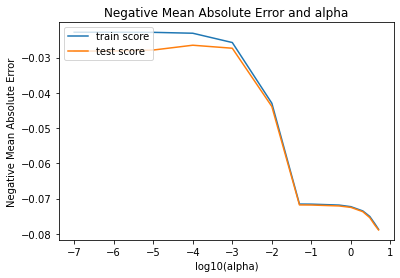

In [1182]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1183]:
alpha = 0.0001

elasticnet = ElasticNet(alpha=alpha)
        
elasticnet.fit(X_train, Y_train) 

ElasticNet(alpha=0.0001)

In [1184]:
elasticnet.coef_

array([ 4.41075279e-02,  1.17030649e-01,  6.43123821e-02,  7.02973104e-03,
        5.64832063e-02,  2.23111184e-02,  1.24025942e-01,  3.23644585e-02,
        5.40782830e-02,  0.00000000e+00,  2.17806506e-01,  5.49187206e-04,
       -7.89945547e-03,  7.26628284e-03,  1.40124004e-02, -1.53740060e-02,
       -8.35790782e-02,  3.67110039e-02,  6.81566830e-02,  2.90592181e-02,
       -7.12999360e-03,  6.68297225e-03,  2.81636896e-02,  2.96126648e-02,
       -1.40520669e-05, -8.22737095e-03, -7.70966526e-03,  3.76915625e-03,
        0.00000000e+00,  1.60973428e-03,  1.27237562e-02, -6.34136834e-03,
       -6.26340405e-03, -1.98854927e-03, -0.00000000e+00, -0.00000000e+00,
        1.34557935e-02,  1.08268197e-02,  2.84151327e-03,  2.29054037e-02,
       -5.86099028e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -6.46485783e-03, -3.80843388e-03,  0.00000000e+00, -6.70353531e-03,
        5.97132344e-02,  4.94067760e-02, -7.98688951e-03, -2.02820839e-03,
       -0.00000000e+00,  

In [1185]:
elasticnet = ElasticNet(alpha=0.0001)
elasticnet.fit(X_train, Y_train)

# predict
y_train_pred = elasticnet.predict(X_train)
print(metrics.r2_score(y_true=Y_train, y_pred=y_train_pred))
y_test_pred = elasticnet.predict(X_test)
print(metrics.r2_score(y_true=Y_test, y_pred=y_test_pred))

0.8800636671464082
0.8795923691003608


In [1186]:
# ElasticNet model parameters
model_parameters_elastic = list(elasticnet.coef_)
model_parameters_elastic.insert(0, elasticnet.intercept_)
model_parameters_elastic = [round(x, 3) for x in model_parameters]
cols = df_final.columns
cols = cols.insert(0, "constant")
z = list(zip(cols, model_parameters_elastic))

#dropping all zero value coefficients and sorting features by values

hyperparameter = []
for i in z:
    if i[1] != float(0.0) or float(-0.0):
        hyperparameter.append(i)
        hyperparameter
hyperparameter
sorted(hyperparameter, key=lambda tup:(-tup[1], tup[0]))

[('GrLivArea', 0.231),
 ('OverallQual', 0.122),
 ('BsmtFinSF1', 0.11),
 ('Neighborhood_Somerst', 0.06),
 ('OverallCond', 0.06),
 ('TotRmsAbvGrd', 0.06),
 ('Neighborhood_NWAmes', 0.057),
 ('BsmtQual', 0.048),
 ('Neighborhood_NoRidge', 0.047),
 ('BsmtUnfSF', 0.042),
 ('BsmtFinType1_LwQ', 0.04),
 ('LotArea', 0.04),
 ('KitchenQual', 0.038),
 ('Exterior2nd_HdBoard', 0.034),
 ('GarageArea', 0.031),
 ('SaleCondition_Normal', 0.029),
 ('GarageCars', 0.028),
 ('BsmtExposure', 0.024),
 ('BsmtFinSF2', 0.023),
 ('Fireplaces', 0.022),
 ('Exterior1st_BrkComm', 0.021),
 ('Foundation_PConc', 0.021),
 ('Neighborhood_CollgCr', 0.02),
 ('LotShape_Reg', 0.013),
 ('Neighborhood_SawyerW', 0.013),
 ('HalfBath', 0.011),
 ('ExterQual', 0.01),
 ('Neighborhood_BrDale', 0.01),
 ('Neighborhood_BrkSide', 0.009),
 ('MasVnrType_Stone', 0.008),
 ('Foundation_CBlock', 0.007),
 ('HouseStyle_1.5Unf', 0.007),
 ('GarageFinish', 0.006),
 ('BsmtFinType1_BLQ', 0.005),
 ('Exterior2nd_Stucco', 0.005),
 ('MasVnrType_None', 0.004

In [1187]:
len(hyperparameter)

69

# Thus we will use LASSO Regression Model